In [ ]:
!pip install matplotlib seaborn


In [1]:
# --- Import Required Libraries ---

# pandas: for loading and manipulating the dataset
import pandas as pd

# matplotlib: for creating plots and visualizations
import matplotlib.pyplot as plt

# seaborn: for statistical visualizations (heatmaps, boxplots, KDE plots, etc.)
import seaborn as sns


In [21]:

# Path to your CSV file
csv_path = '../data/raw/tasks_dataset.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Preview the first 10 rows
df.head(10)


,task_id,team,role,user_id,task_name,description,priority,expected_duration,created_at,completed_at,completion_time
0,7908,Engineering,Data Engineer,133,Performance profiling,Performance profiling for engineering team by ...,Low,4,2024-07-01 09:06:00,2024-07-01 11:54:33.263952,2.81
1,2251,Operations,Logistics Coordinator,3,Resource planning,Resource planning for operations team by logis...,Medium,8,2024-07-01 09:18:00,2024-07-02 12:54:09.497882,27.60
2,2178,Marketing,Social Media Manager,43,Keyword research,Keyword research for marketing team by social ...,Low,7,2024-07-01 09:18:00,2024-07-02 10:22:49.919535,25.08
3,3587,Engineering,Backend Engineer,133,Integration testing,Integration testing for engineering team by ba...,Low,11,2024-07-01 09:19:00,2024-07-02 13:42:56.019706,28.40
4,8602,Engineering,QA Engineer,108,Implement new endpoint,Implement new endpoint for engineering team by...,Low,11,2024-07-01 09:23:00,2024-07-02 16:31:21.089017,31.14
5,7164,Engineering,Backend Engineer,125,Fix backend API bug,Fix backend API bug for engineering team by ba...,High,5,2024-07-01 09:25:00,2024-07-02 09:24:34.687681,23.99
6,2092,Operations,Logistics Coordinator,159,Process documentation,Process documentation for operations team by l...,Low,6,2024-07-01 09:28:00,2024-07-02 09:50:09.882155,24.37
7,9892,Engineering,Data Engineer,77,Write unit tests,Write unit tests for engineering team by data ...,Low,7,2024-07-01 09:51:00,2024-07-04 10:10:12.149629,72.32
8,9008,Engineering,Frontend Engineer,164,Database schema update,Database schema update for engineering team by...,Medium,4,2024-07-01 09:52:00,2024-07-01 13:09:16.261225,3.29
9,3112,Engineering,Backend Engineer,98,Performance profiling,Performance profiling for engineering team by ...,Low,9,2024-07-01 09:55:00,2024-07-02 12:10:21.833520,26.26


In [22]:
df.describe()


,task_id,user_id,expected_duration,completion_time
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,100.207800,5.780100,33.460100
std,2886.89568,57.963773,3.034908,30.133199
min,1.00000,1.000000,1.000000,0.500000
25%,2500.75000,50.000000,3.000000,17.327500
50%,5000.50000,100.000000,5.000000,24.090000
75%,7500.25000,151.000000,8.000000,46.170000
max,10000.00000,200.000000,12.000000,259.480000


In [ ]:
# Convert numeric identifiers to integers
df['task_id'] = df['task_id'].astype(int)
df['user_id'] = df['user_id'].astype(int)

# Convert duration columns to floats for accurate numerical analysis
df['expected_duration'] = df['expected_duration'].astype(float)
df['completion_time'] = df['completion_time'].astype(float)

# Convert categorical fields to 'category' dtype for efficiency
df['priority'] = df['priority'].astype('category')
df['team'] = df['team'].astype('category')
df['role'] = df['role'].astype('category')
df['task_name'] = df['task_name'].astype('category')

# Convert datetime fields
df['created_at'] = pd.to_datetime(df['created_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])





In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   task_id            10000 non-null  int64         
 1   team               10000 non-null  category      
 2   role               10000 non-null  category      
 3   user_id            10000 non-null  int64         
 4   task_name          10000 non-null  category      
 5   description        10000 non-null  object        
 6   priority           10000 non-null  category      
 7   expected_duration  10000 non-null  float64       
 8   created_at         10000 non-null  datetime64[ns]
 9   completed_at       10000 non-null  datetime64[ns]
 10  completion_time    10000 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 588.4+ KB


### Which teams have the highest number of tasks assigned?

The bar chart below shows the distribution of tasks across all teams.


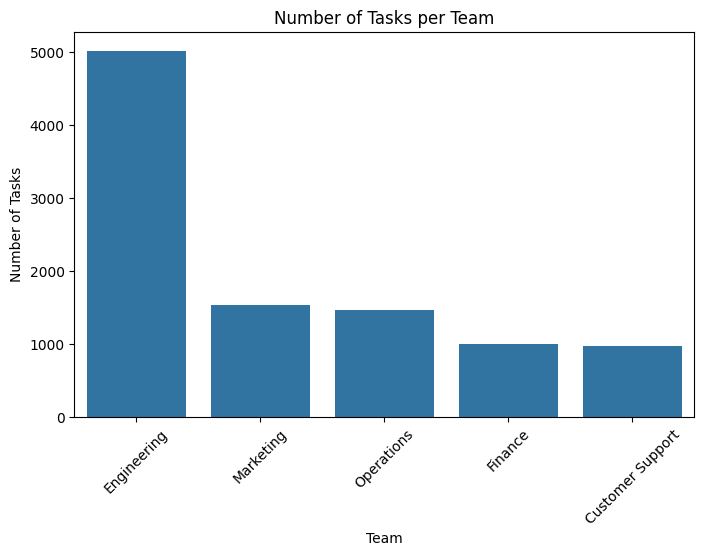

In [27]:
# Plot count of tasks assigned to each team
plt.figure(figsize=(8,5))

# Countplot sorted by highest → lowest task counts using value_counts()
sns.countplot(data=df, 
              x='team', 
              order=df['team'].value_counts().index)

# Add title and axis labels
plt.title("Number of Tasks per Team")
plt.ylabel("Number of Tasks")
plt.xlabel("Team")

# Rotate team labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


### Insight  
The chart shows that **Engineering** has the highest number of tasks, while **Finance** and **Customer Support** have the lowest.  
This means the workload is not evenly distributed across teams.

### Why this matters for the project  
Uneven workload affects productivity.  
Teams with too many tasks struggle to meet deadlines, while others are underused.  
Understanding this imbalance helps justify why a task prediction system is useful for planning and resource management.

### ML Implication  
Because some teams have more data, the model will learn their patterns more accurately.  
Teams with fewer tasks may produce weaker predictions unless the imbalance is handled during modeling.

---

### Which roles are handling the most tasks?

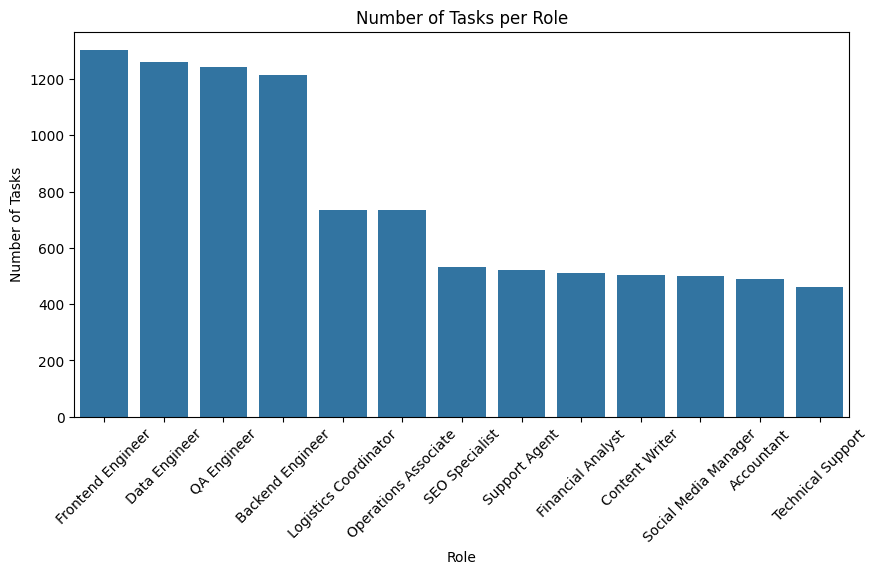

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='role', order=df['role'].value_counts().index)
plt.title("Number of Tasks per Role")
plt.ylabel("Number of Tasks")
plt.xlabel("Role")
plt.xticks(rotation=45)
plt.show()


### Insight  
The chart shows that **Data Engineers**, **Frontend Engineers**, and **QA Engineers** have the highest number of tasks, while roles like **Support Agent**, **Financial Analyst**, and **SEO Specialist** have the lowest.  
This indicates a significant workload imbalance across roles.

### Why this matters for the project  
Uneven task distribution can lead to burnout in high-load roles and underutilization in others.  
It may also reflect organizational priorities or gaps in task assignment logic.  
Recognizing this imbalance supports the case for a smarter task allocation system that adapts to role capacity and specialization.

### ML Implication  
Roles with more task data will yield stronger predictive models.  
Low-volume roles may require data augmentation or transfer learning to improve prediction quality.  
Balancing the dataset or applying role-specific modeling strategies will be key to fairness and accuracy.


----

### What is the distribution of task priorities?

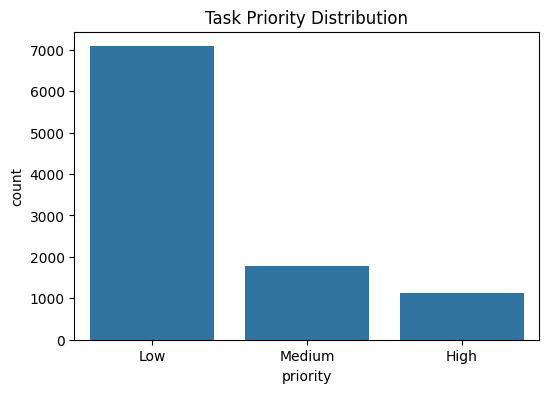

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='priority', order=['Low','Medium','High'])
plt.title("Task Priority Distribution")
plt.show()


### Insight  
The chart shows that **Low priority** tasks dominate the dataset, with nearly 3,500 entries.  
**Medium priority** tasks are significantly fewer, and **High priority** tasks are the least represented, just over 500.  
This indicates a strong skew toward non-urgent task labeling.

### Why this matters for the project  
An imbalanced priority distribution can lead to misaligned resource planning and delayed attention to critical work.  
If most tasks are marked as low priority, teams may overlook urgent issues or fail to escalate appropriately.  
Understanding this skew supports the need for a system that can intelligently assess and assign task priority.

### ML Implication  
The model will be biased toward predicting low priority unless the imbalance is addressed.  
Techniques like **class weighting**, **resampling**, or **priority-aware loss functions** will be important.  
Feature engineering that captures urgency signals beyond the raw label will improve model robustness and fairness.

----


### How does task priority affect the accuracy of duration estimates?

/var/folders/19/655s5m1n6yv9rbstc6jbgx600000gn/T/ipykernel_68681/3846803996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='priority', y='duration_error', palette="Set2")


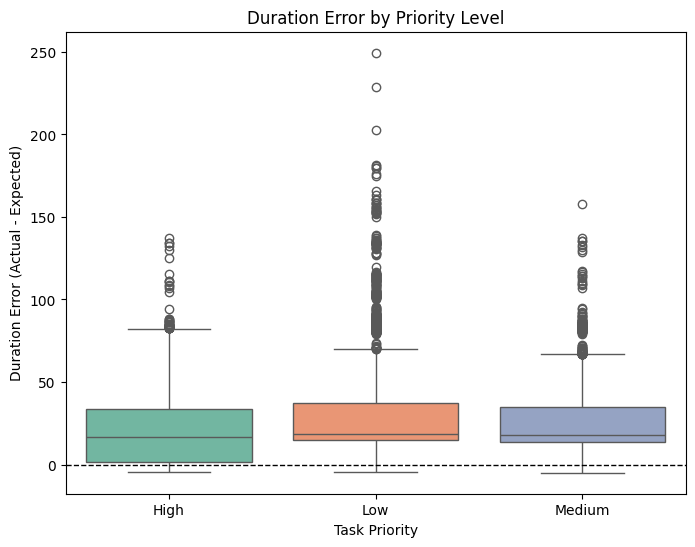

In [30]:
df['duration_error'] = df['completion_time'] - df['expected_duration']
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='priority', y='duration_error', palette="Set2")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # perfect estimation line
plt.title("Duration Error by Priority Level")
plt.xlabel("Task Priority")
plt.ylabel("Duration Error (Actual - Expected)")
plt.show()

### Insight  
The chart shows that **Low priority** tasks have the largest spread in duration error, with numerous outliers and a wider interquartile range.  
**High** and **Medium priority** tasks show more consistent duration errors, though High priority tasks still exhibit some extreme values.  
This indicates that **low-priority tasks are more likely to be misestimated or delayed**, possibly due to neglect or lack of urgency.

### Why this matters for the project  
Inaccurate duration estimates can disrupt planning and resource allocation, especially when low-priority tasks accumulate unnoticed.  
The variability in duration error suggests that **priority alone isn’t a reliable predictor of task accuracy**.  
This supports the need for a predictive system that accounts for task context, urgency, and historical performance—not just priority labels.

### ML Implication  
The model should treat **priority level as a contextual feature**, not a direct proxy for duration accuracy.  
Low-priority tasks may require **special handling**, such as adjusted expectations or delay risk flags.  
Outlier detection, robust regression, and **priority-aware error modeling** will be key to improving prediction reliability.

---

### Do different teams complete tasks at different speeds, and what does that reveal about efficiency or bottlenecks?

/var/folders/19/655s5m1n6yv9rbstc6jbgx600000gn/T/ipykernel_68681/2901359467.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_avg = df.groupby('team')['completion_time'].mean().sort_values(ascending=False)


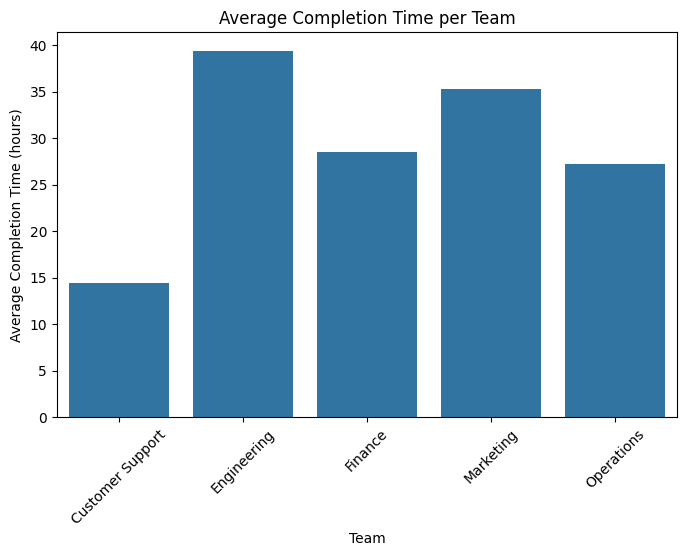

In [ ]:
plt.figure(figsize=(8,5))
team_avg = df.groupby('team')['completion_time'].mean().sort_values(ascending=False)
sns.barplot(x=team_avg.index, y=team_avg.values)
plt.title("Average Completion Time per Team")
plt.ylabel("Average Completion Time (hours)")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


### Insight  
The chart shows that **Engineering** has the highest average task completion time, followed by **Marketing**, **Finance**, **Operations**, and **Customer Support** with the lowest.  
This suggests that Engineering tasks take significantly longer to complete, potentially due to complexity, volume, or process inefficiencies.

### Why this matters for the project  
Longer completion times in Engineering may indicate **bottlenecks**, **overloaded workflows**, or **underestimated task complexity**.  
If other teams complete tasks faster despite lower volume or complexity, this raises questions about **resource allocation**, **tooling**, or **workflow design**.  
This insight supports the need for a predictive system that adjusts expectations based on team-specific patterns and task types.

### ML Implication  
Team affiliation should be a key feature in the model, especially for predicting task duration.  
Engineering tasks may require **custom modeling strategies**, such as **longer time windows**, **complexity indicators**, or **role-specific baselines**.  
Outlier handling and **team-aware feature interactions** will be essential to avoid skewed predictions and improve planning accuracy.


---

### How does Piority Affects Completion time?

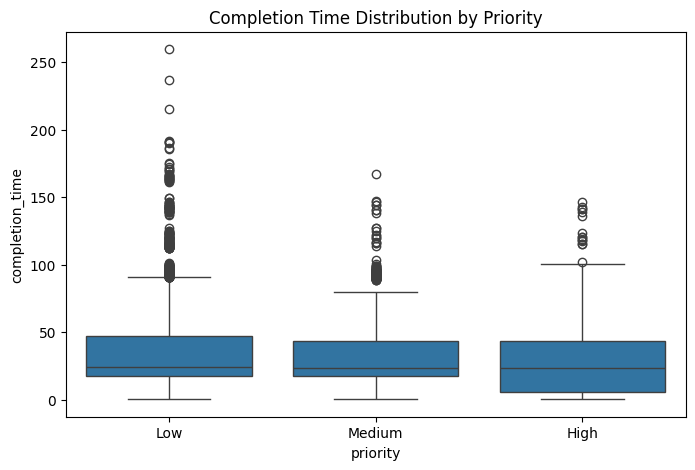

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='priority', y='completion_time', order=['Low','Medium','High'])
plt.title("Completion Time Distribution by Priority")
plt.show()


### Insight  
The chart shows that tasks across all priority levels—**Low**, **Medium**, and **High**—have similar median completion times.  
However, **Low priority** tasks exhibit significantly more outliers, indicating that some take much longer to complete than expected.  
This suggests that **priority labels do not reliably influence task speed**, and that **low-priority tasks may be neglected or poorly scoped**.

### Why this matters for the project  
If low-priority tasks are frequently delayed, they can accumulate and disrupt long-term planning—even if they seem non-urgent.  
The similarity in median completion times across priorities also implies that **urgency is not driving faster execution**, which may reflect weak prioritization logic or inconsistent team behavior.  
This insight supports the need for a predictive system that goes beyond static priority labels and incorporates real execution patterns.

### ML Implication  
Priority should be treated as a **contextual feature**, not a direct predictor of speed.  
The model should account for **priority volatility**, possibly using **uncertainty bounds**, **delay risk flags**, or **priority-task type interactions**.  
Outlier handling and **robust regression techniques** will be essential to avoid skewed predictions and improve planning accuracy.


In [33]:
df.to_csv("../data/cleaned_tasks.csv", index=False)
